<a href="https://colab.research.google.com/github/Smarikatripathi/Data-Science/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data import

In [ ]:
import kagglehub
import pandas as pd
import os


# Download latest version
dataset_dir = kagglehub.dataset_download("fredericobreno/play-tennis")

# Find the CSV file within the directory - assuming there's only one CSV file
for filename in os.listdir(dataset_dir):
    if filename.endswith(".csv"):
        filepath = os.path.join(dataset_dir, filename)
        break  # Stop after finding the first CSV file

print("Path to dataset file:", filepath)

100%|██████████| 337/337 [00:00<00:00, 756kB/s]

Extracting files...
Path to dataset file: /root/.cache/kagglehub/datasets/fredericobreno/play-tennis/versions/1/play_tennis.csv


In [ ]:
df = pd.read_csv(filepath)
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


We can create the dataset using pandas

In [ ]:
import pandas as pd
import math

data = {
    'outlook': ['Sunny','Sunny','Overcast','Rain','Rain','Rain','Overcast',
                'Sunny','Sunny','Rain','Sunny','Overcast','Overcast','Rain'],
    'temp': ['Hot','Hot','Hot','Mild','Cool','Cool','Cool',
             'Mild','Cool','Mild','Mild','Mild','Hot','Mild'],
    'humidity': ['High','High','High','High','Normal','Normal','Normal',
                 'High','Normal','Normal','Normal','High','Normal','High'],
    'wind': ['Weak','Strong','Weak','Weak','Weak','Strong','Strong',
             'Weak','Weak','Weak','Strong','Strong','Weak','Strong'],
    'play': ['No','No','Yes','Yes','Yes','No','Yes',
             'No','Yes','Yes','Yes','Yes','Yes','No']
}

df1 = pd.DataFrame(data)


In [ ]:
df1

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
df.head()


,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [ ]:
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')


Rows: 14, Columns: 6


In [ ]:
print(df.columns)


Index(['day', 'outlook', 'temp', 'humidity', 'wind', 'play'], dtype='object')


In [ ]:
df.describe()


,day,outlook,temp,humidity,wind,play
count,14,14,14,14,14,14
unique,14,3,3,2,2,2
top,D1,Sunny,Mild,High,Weak,Yes
freq,1,5,6,7,8,9


In [ ]:
df.drop(['day'],axis=1,inplace=True)


In [ ]:
df

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
df.shape

(14, 5)

In [ ]:
df['play'].value_counts()


,count
play,
Yes,9
No,5


In [ ]:
original_df=df.copy()
original_df

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder ()
for i in df.columns:
    df[i] = encoder.fit_transform(df[i])
df.head()


,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [ ]:
X= df.iloc[:,:4]
y= df.iloc[:,-1]

Simply we can write as

In [ ]:
X = df.drop('play', axis=1)
y = df['play']
# OR
# X = df[['outlook', 'temp', 'humidity', 'wind']]
# y = df['play']

X.head()
y


,play
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [ ]:
X.head()


,outlook,temp,humidity,wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1


In [ ]:
y.head()


,play
0,0
1,0
2,1
3,1
4,1


In [ ]:
tn = DecisionTreeClassifier(criterion="entropy",splitter="best",max_depth=4,random_state=42,)
tn.fit(X,y)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

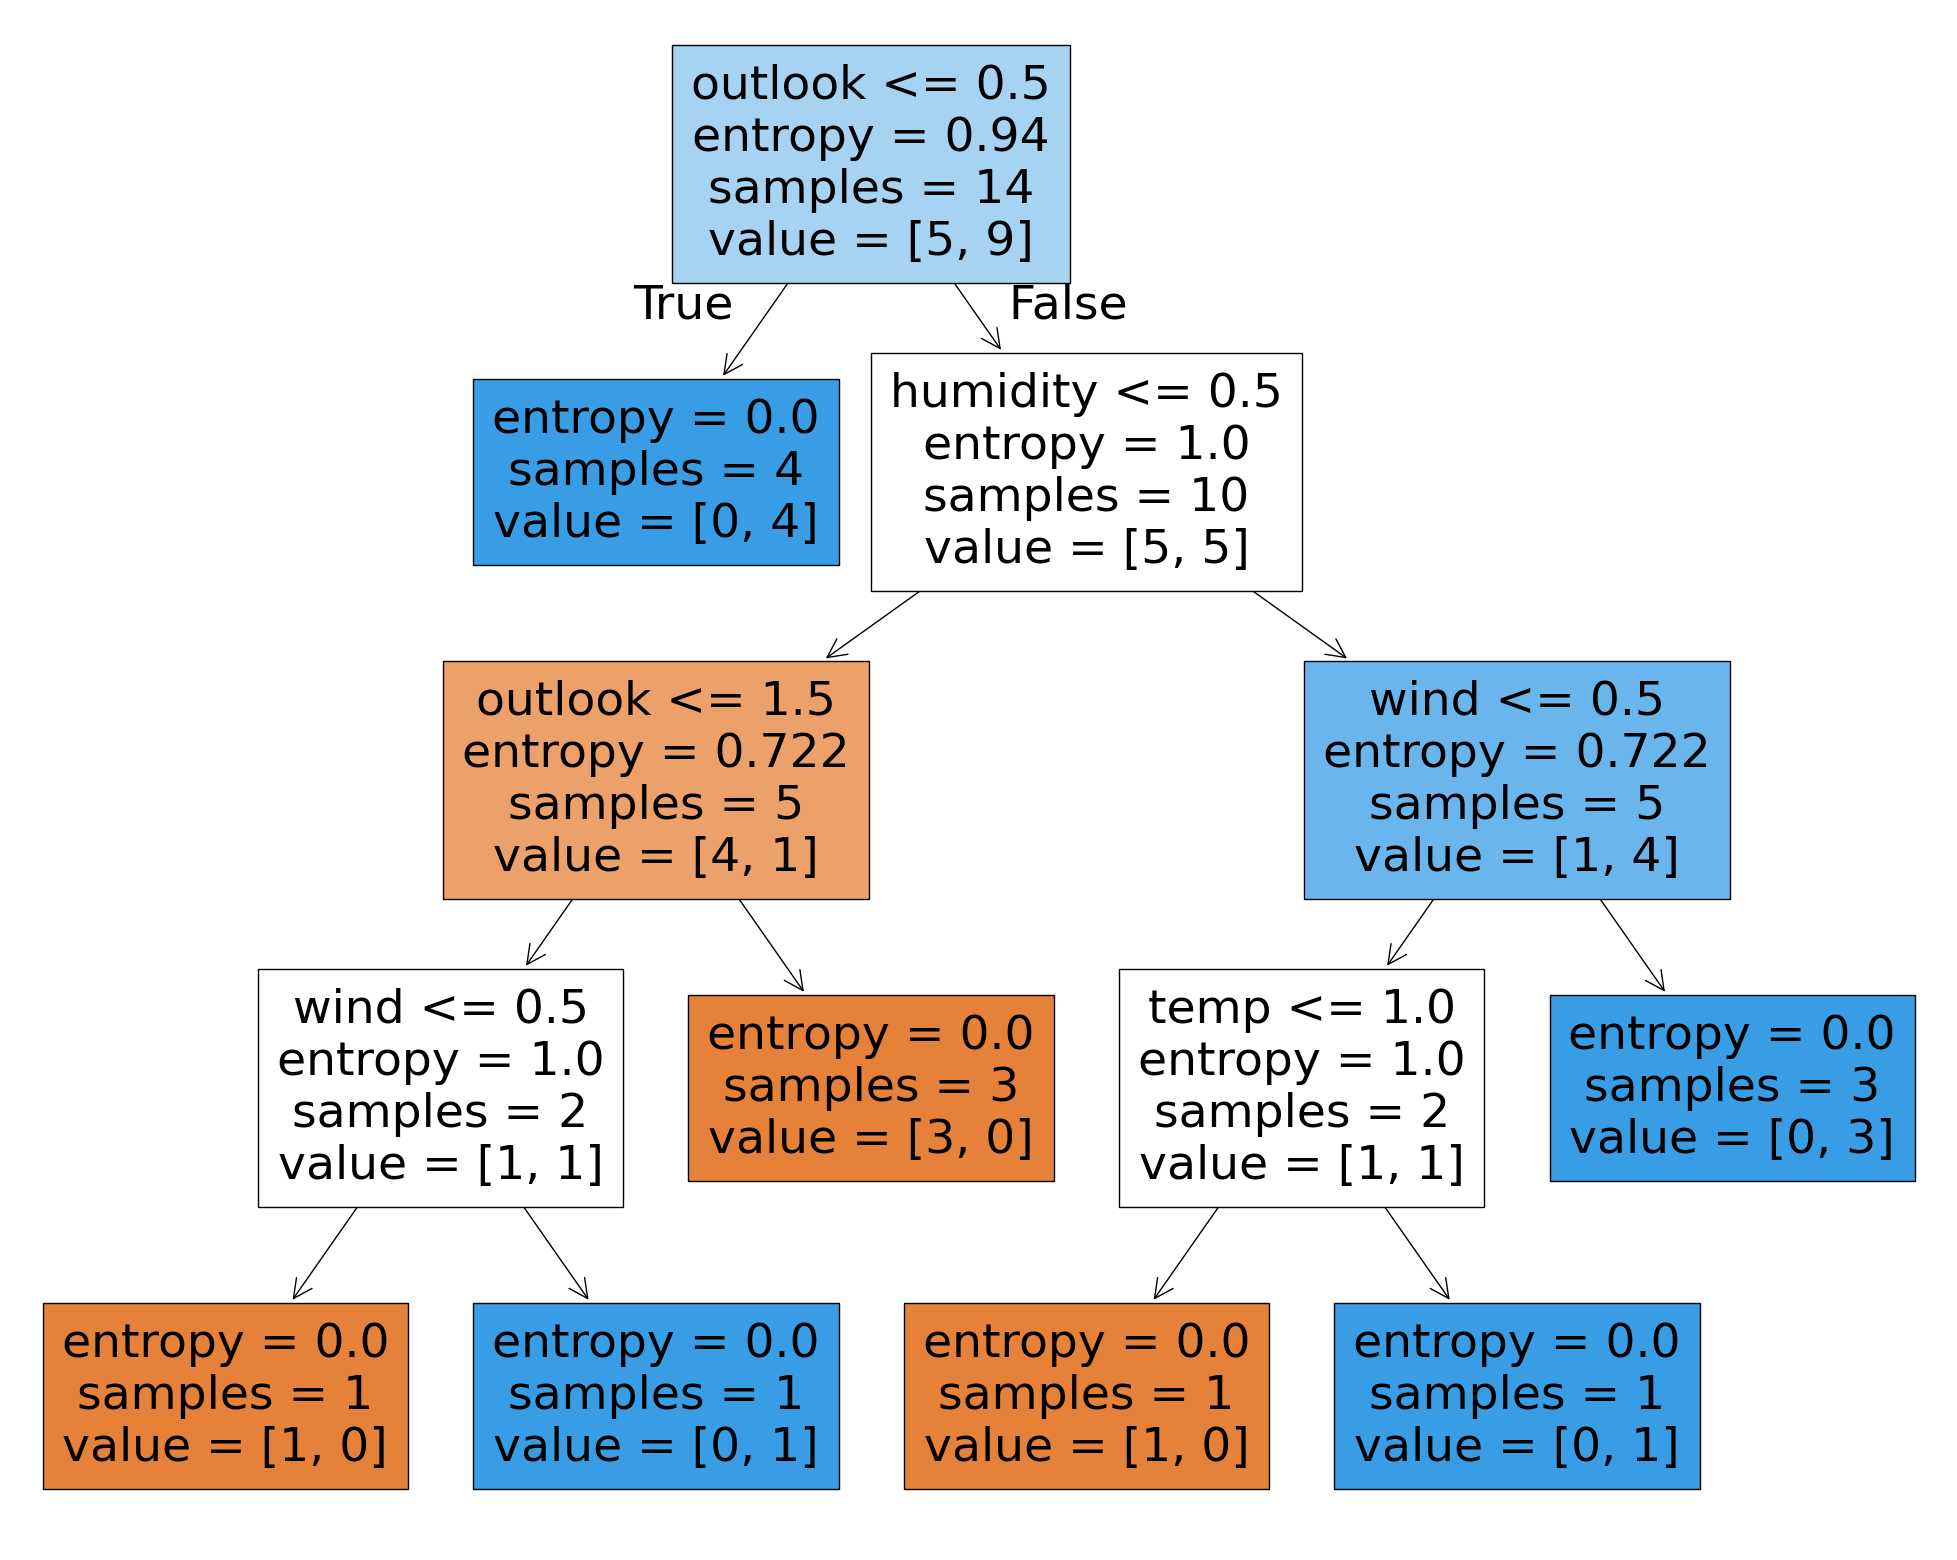

In [ ]:
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tn,
                   feature_names=X.columns,
                   filled=True)

In [ ]:
new_sample = [[2, 0, 0, 1]]  # Sunny=2, Cool=0, High=0, Strong=1
prediction = tn.predict(new_sample)
prediction_label = encoder.inverse_transform(prediction)
print("Predicted class:", prediction_label[0])

Predicted class: No


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Use gini algorithm

In [ ]:
tn = DecisionTreeClassifier(criterion="gini")
tn.fit(X,y)

DecisionTreeClassifier()

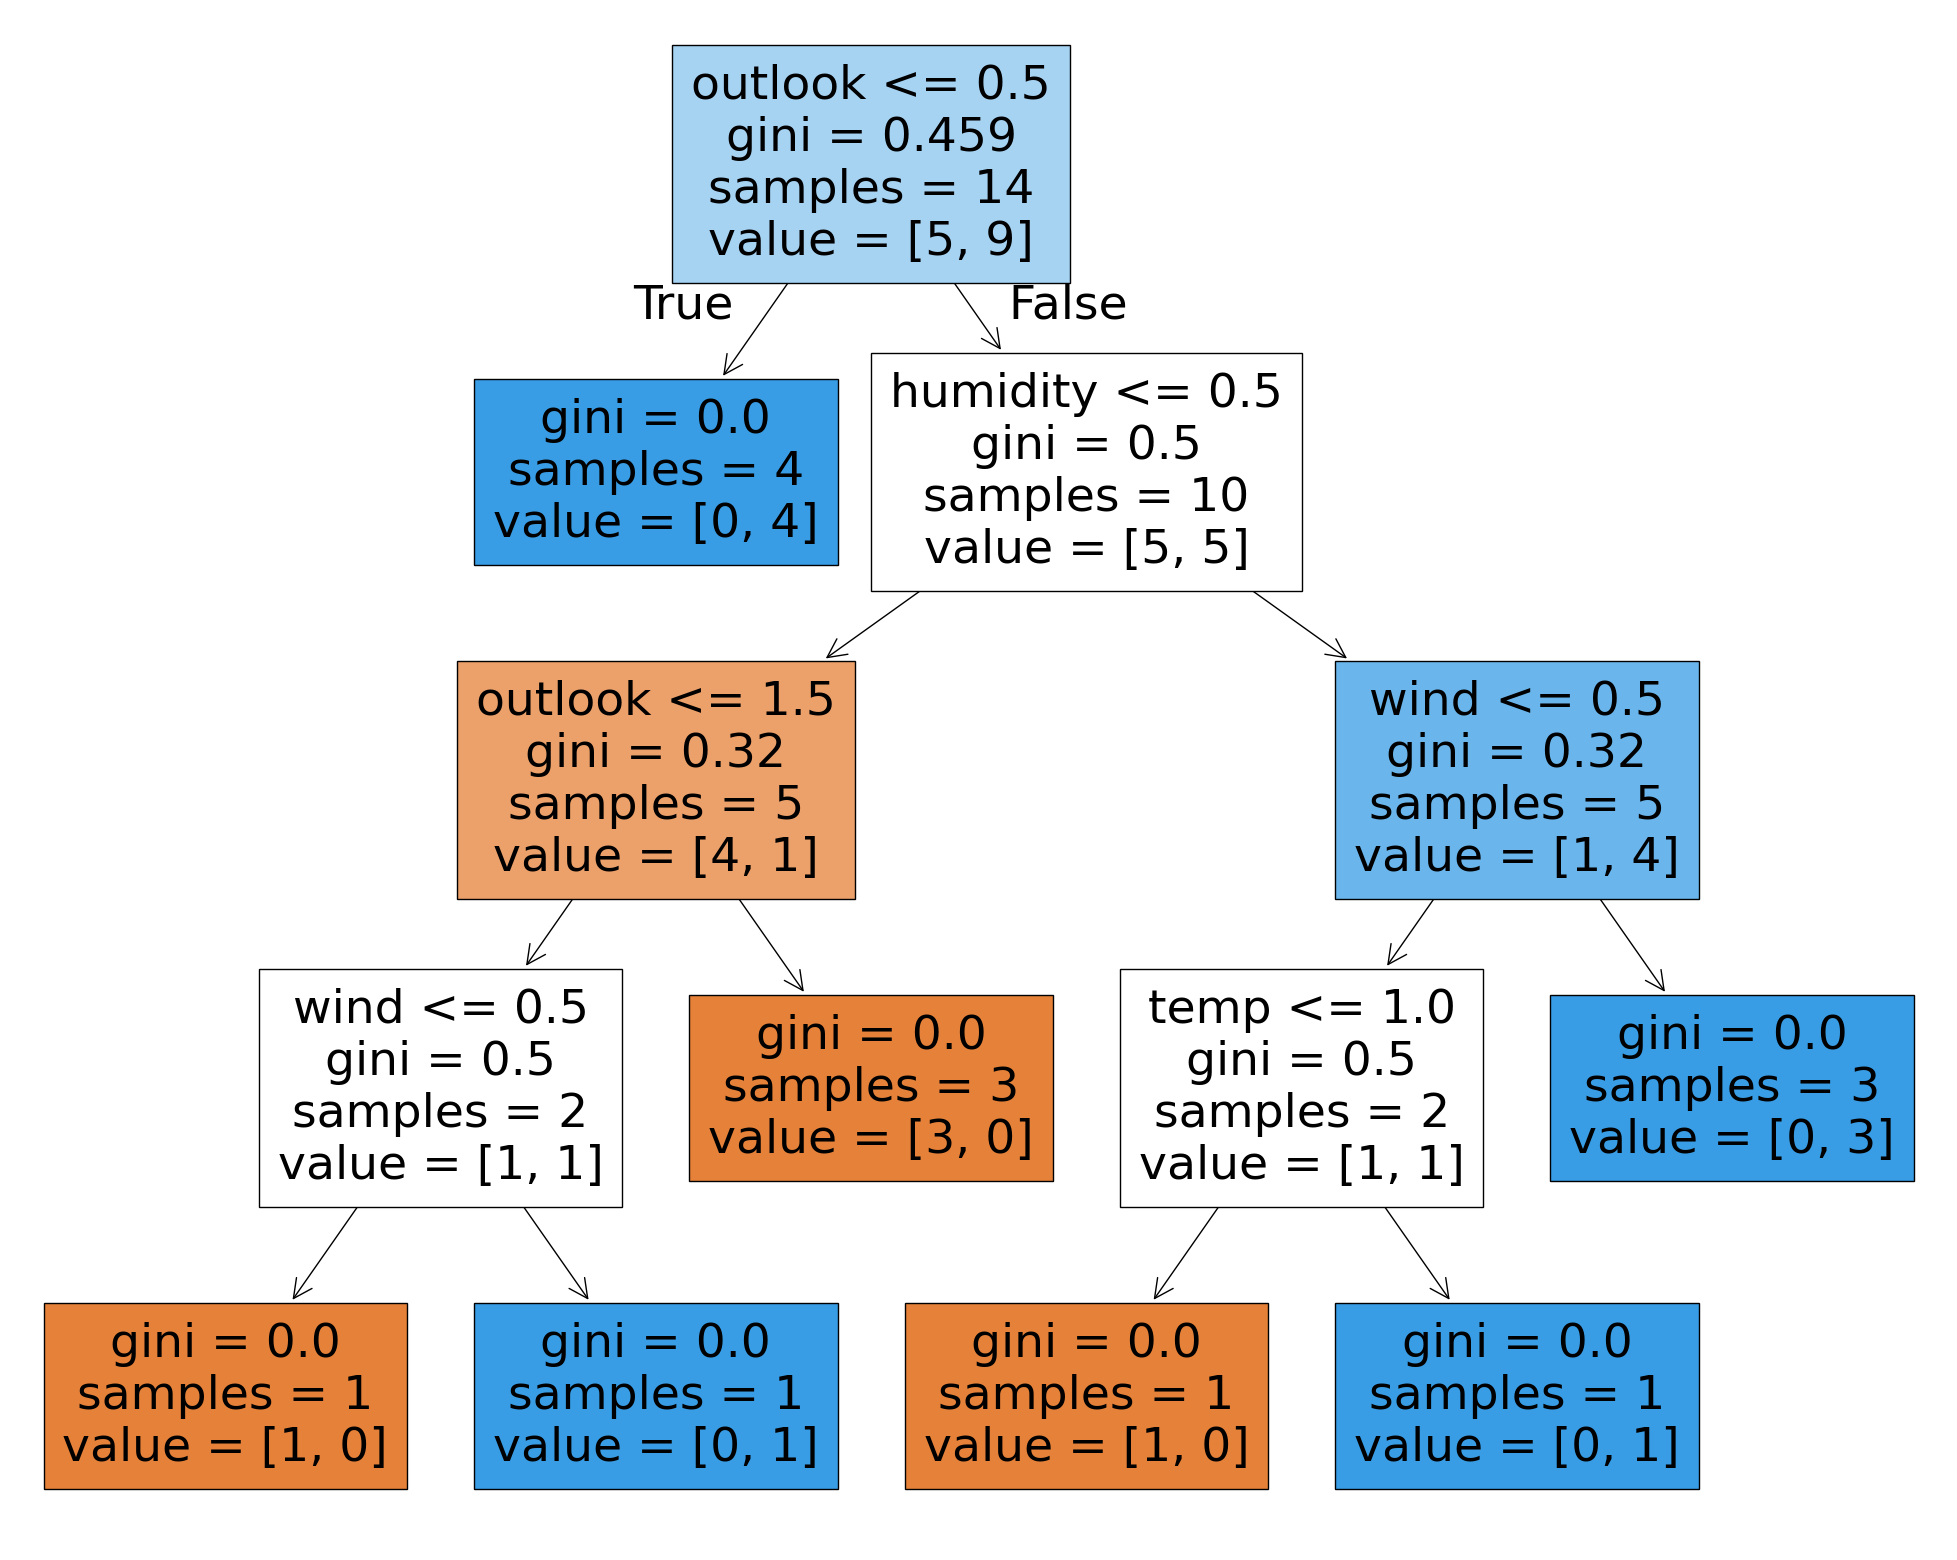

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tn,
                   feature_names=X.columns,
                   filled=True)


create the decision tree manually

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Dataset Load
df = pd.read_csv(filepath)
df




,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [ ]:
# Step 2: Entropy Function
def calculate_entropy(column):
    """
    Calculate the entropy of a column.
    """
    probabilities = column.value_counts(normalize=True)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Step 3: Weighted Entropy
def weighted_entropy(df, split_feature, target_feature):
    """
    Calculate the weighted entropy for a split feature.
    """
    values = df[split_feature].unique()
    total_instances = len(df)
    weighted_entropy = 0

    for value in values:
        subset = df[df[split_feature] == value]
        subset_entropy = calculate_entropy(subset[target_feature])
        weight = len(subset) / total_instances
        weighted_entropy += weight * subset_entropy
    return weighted_entropy

# Step 4: Information Gain Calculation
def calculate_information_gain(df, split_feature, target_feature):
    """
    Calculate the information gain for splitting on a feature.
    """
    total_entropy = calculate_entropy(df[target_feature])
    subset_entropy = weighted_entropy(df, split_feature, target_feature)
    return total_entropy - subset_entropy

# Step 5: Compute Information Gain for Each Feature
target_feature = 'play'
features = ['outlook', 'temp', 'humidity', 'wind']

info_gains = {}
for feature in features:
    info_gains[feature] = calculate_information_gain(df, feature, target_feature)
    print(f"Information Gain for {feature}: {info_gains[feature]:.4f}")

# Step 6: Find Best Feature
best_feature = max(info_gains, key=info_gains.get)
print(f"\nBest Feature to Split On: {best_feature}")

Information Gain for outlook: 0.2467
Information Gain for temp: 0.0292
Information Gain for humidity: 0.1518
Information Gain for wind: 0.0481

Best Feature to Split On: outlook


In [ ]:
# Step 2: Helper Functions
def calculate_entropy(column):
    """
    Calculate the entropy of a column.
    """
    probabilities = column.value_counts(normalize=True)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def calculate_information_gain(df, split_feature, target_feature):
    """
    Calculate the information gain for splitting on a feature.
    """
    # Calculate total entropy of the target feature
    total_entropy = calculate_entropy(df[target_feature])

    # Calculate weighted entropy for the split
    values, counts = np.unique(df[split_feature], return_counts=True)
    weighted_entropy = 0
    for i in range(len(values)):
        subset = df[df[split_feature] == values[i]]
        subset_entropy = calculate_entropy(subset[target_feature])
        weight = counts[i] / np.sum(counts)
        weighted_entropy += weight * subset_entropy

    # Information Gain
    return total_entropy - weighted_entropy

# Step 3: Recursive Decision Tree Algorithm
class DecisionTree:
    def __init__(self, df, target_feature, features):
        self.df = df
        self.target_feature = target_feature
        self.features = features

    def build_tree(self, data, features, depth=0):
        # Base Cases
        if len(data[self.target_feature].unique()) == 1:
            return data[self.target_feature].iloc[0]  # Pure subset (only one class remains)
        if len(features) == 0:
            return data[self.target_feature].mode()[0]  # No more features to split on

        # Calculate information gain for each feature
        info_gains = {feature: calculate_information_gain(data, feature, self.target_feature) for feature in features}
        best_feature = max(info_gains, key=info_gains.get)  # Feature with highest information gain

        # Build subtrees recursively
        tree = {best_feature: {}}
        remaining_features = [f for f in features if f != best_feature]

        for value in data[best_feature].unique():
            subset = data[data[best_feature] == value]
            tree[best_feature][value] = self.build_tree(subset, remaining_features, depth + 1)

        return tree

    def fit(self):
        return self.build_tree(self.df, self.features)

# Step 4: Train the Decision Tree
target_feature = 'play'
features = ['outlook', 'temp', 'humidity', 'wind']
dt = DecisionTree(df, target_feature, features)
decision_tree = dt.fit()

# Step 5: Display the Decision Tree
import pprint
pprint.pprint(decision_tree)

{'outlook': {'Overcast': 'Yes',
             'Rain': {'wind': {'Strong': 'No', 'Weak': 'Yes'}},
             'Sunny': {'humidity': {'High': 'No', 'Normal': 'Yes'}}}}


In [ ]:
!pip install graphviz


In [ ]:
from graphviz import Digraph

class DecisionTreeVisualizer:
    def __init__(self, decision_tree):
        self.tree = decision_tree
        self.graph = Digraph(format='png')
        self.node_count = 0

    def _add_nodes_edges(self, tree, parent=None):
        """
        Recursive function to add nodes and edges for the tree.
        """
        for feature, branches in tree.items():
            current_node = f'Node_{self.node_count}'
            self.graph.node(current_node, feature)  # Add feature as node
            if parent:
                self.graph.edge(parent, current_node)  # Connect to parent
            self.node_count += 1

            for value, subtree in branches.items():
                if isinstance(subtree, dict):  # If subtree is another dictionary
                    self._add_nodes_edges(subtree, current_node)
                else:  # If it's a leaf node
                    leaf_node = f'Leaf_{self.node_count}'
                    self.graph.node(leaf_node, f'{value}: {subtree}', shape='box', style='filled', color='red')
                    self.graph.edge(current_node, leaf_node, label=value)
                    self.node_count += 1

    def visualize(self, output_file='decision_tree'):
        """
        Visualize the decision tree.
        """
        self._add_nodes_edges(self.tree)
        print("Rendering the decision tree...")
        try:
            output_path = self.graph.render(output_file)
            print(f"Decision tree saved to: {output_path}")
            return output_path
        except Exception as e:
            print("Error while rendering:", e)

# Step 1: Pass the decision tree to the visualizer
visualizer = DecisionTreeVisualizer(decision_tree)

# Step 2: Generate and view the tree
visualizer.visualize('decision_tree')


Rendering the decision tree...
Decision tree saved to: decision_tree.png


'decision_tree.png'

to list the content saved in the current colab directory

In [ ]:
!ls -l /content/


total 36
-rw-r--r-- 1 root root   592 Dec 26 03:23 decision_tree
-rw-r--r-- 1 root root 28450 Dec 26 03:23 decision_tree.png
drwxr-xr-x 1 root root  4096 Dec 11 14:34 sample_data


to download the image or content that is saved in colab

In [ ]:
from google.colab import files
files.download('/content/decision_tree.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:


file_path = '/content/decision_tree.png'  # Replace with your file's path
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"File {file_path} has been removed.")
else:
    print(f"File {file_path} does not exist.")


File /content/decision_tree.png has been removed.


to show image directly in colab

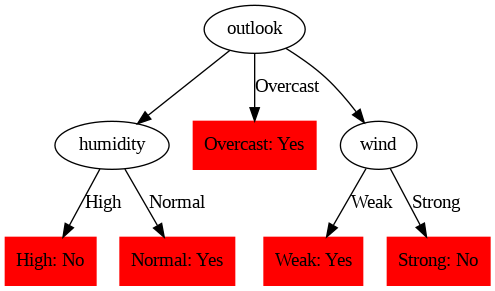

In [ ]:
from IPython.display import Image
Image('/content/decision_tree.png')


Instead of using sklearn we will use Orange as it say it will give precise result for Decision tree ID3 calculation

In [ ]:
pip install orange3


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.5/270.5 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70

In [ ]:
import Orange
# Define categorical features
outlook = Orange.data.DiscreteVariable(
    "outlook", values=["Sunny", "Overcast", "Rain"]
)

temp = Orange.data.DiscreteVariable(
    "temp", values=["Hot", "Mild", "Cool"]
)

humidity = Orange.data.DiscreteVariable(
    "humidity", values=["High", "Normal"]
)

wind = Orange.data.DiscreteVariable(
    "wind", values=["Weak", "Strong"]
)

# Define class variable
play = Orange.data.DiscreteVariable(
    "play", values=["No", "Yes"]
)
# Create Domain
domain = Orange.data.Domain(
    [outlook, temp, humidity, wind],  # features
    play                               # target
)


In [ ]:
# create data
data = Orange.data.Table.from_list(
    domain,
    [
        ["Sunny", "Hot", "High", "Weak", "No"],
        ["Sunny", "Hot", "High", "Strong", "No"],
        ["Overcast", "Hot", "High", "Weak", "Yes"],
        ["Rain", "Mild", "High", "Weak", "Yes"],
        ["Rain", "Cool", "Normal", "Weak", "Yes"],
        ["Rain", "Cool", "Normal", "Strong", "No"],
        ["Overcast", "Cool", "Normal", "Strong", "Yes"],
        ["Sunny", "Mild", "High", "Weak", "No"],
        ["Sunny", "Cool", "Normal", "Weak", "Yes"],
        ["Rain", "Mild", "Normal", "Weak", "Yes"],
        ["Sunny", "Mild", "Normal", "Strong", "Yes"],
        ["Overcast", "Mild", "High", "Strong", "Yes"],
        ["Overcast", "Hot", "Normal", "Weak", "Yes"],
        ["Rain", "Mild", "High", "Strong", "No"],
    ]
)


In [ ]:
data

[[Sunny, Hot, High, Weak | No],
 [Sunny, Hot, High, Strong | No],
 [Overcast, Hot, High, Weak | Yes],
 [Rain, Mild, High, Weak | Yes],
 [Rain, Cool, Normal, Weak | Yes],
 ...
]

In [ ]:
tree_learner = Orange.classification.TreeLearner(
    measure="entropy",    # Information Gain
    max_depth=None        # No pre-pruning
)

tree_model = tree_learner(data)


In [ ]:
def print_tree(node, indent=""):
    # Leaf node check
    if node.children is None or len(node.children) == 0:
        class_idx = int(node.value)
        class_name = node.domain.class_var.values[class_idx]
        print(indent + "→", class_name)
        return

    # Decision node
    attr_name = node.split_variable.name  # Updated for 3.40.0

    for val, child in zip(node.branch_values, node.children):
        print(indent + f"{attr_name} = {val}")
        print_tree(child, indent + "  ")


In [ ]:
import Orange

# Prepare data as before
outlook = Orange.data.DiscreteVariable("outlook", values=["Sunny", "Overcast", "Rain"])
temp = Orange.data.DiscreteVariable("temp", values=["Hot", "Mild", "Cool"])
humidity = Orange.data.DiscreteVariable("humidity", values=["High", "Normal"])
wind = Orange.data.DiscreteVariable("wind", values=["Weak", "Strong"])
play = Orange.data.DiscreteVariable("play", values=["No", "Yes"])

domain = Orange.data.Domain([outlook, temp, humidity, wind], play)

data = Orange.data.Table.from_list(domain, [
    ["Sunny", "Hot", "High", "Weak", "No"],
    ["Sunny", "Hot", "High", "Strong", "No"],
    ["Overcast", "Hot", "High", "Weak", "Yes"],
    ["Rain", "Mild", "High", "Weak", "Yes"],
    ["Rain", "Cool", "Normal", "Weak", "Yes"],
    ["Rain", "Cool", "Normal", "Strong", "No"],
    ["Overcast", "Cool", "Normal", "Strong", "Yes"],
    ["Sunny", "Mild", "High", "Weak", "No"],
    ["Sunny", "Cool", "Normal", "Weak", "Yes"],
    ["Rain", "Mild", "Normal", "Weak", "Yes"],
    ["Sunny", "Mild", "Normal", "Strong", "Yes"],
    ["Overcast", "Mild", "High", "Strong", "Yes"],
    ["Overcast", "Hot", "Normal", "Weak", "Yes"],
    ["Rain", "Mild", "High", "Strong", "No"]
])

# Train tree
tree_learner = Orange.classification.TreeLearner(measure="entropy")
tree_model = tree_learner(data)


In [ ]:
# Predict new samples
sample = Orange.data.Table.from_list(
    tree_model.domain,
    [["Sunny", "Cool", "High", "Strong", "?"]]
)

prediction = tree_model(sample)
print(prediction[0])  # Yes / No


0
